In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('all_stocks_5yr.csv',parse_dates=True, index_col='date')

In [3]:
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
#Stock Selection
df = df[df['Name']=='AAPL']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
 5   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.9+ KB


In [11]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [14]:
df = df[['close']]

In [16]:
df.head()

,close
date,
2013-02-08,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
2013-02-13,66.7156
2013-02-14,66.6556


In [27]:
def lagit(df, lags):
    names = list()
    for i in range(1,lags+1):
        df['lag_'+str(i)] = df['close'].shift(i)
        names.append('lag_'+str(i))
    df.dropna(inplace=True)    
    return names

In [28]:
lagnames = lagit(df,5)

In [29]:
lagnames

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [30]:
df.head()

,close,lag_1,lag_2,lag_3,lag_4,lag_5
date,,,,,,
2013-02-15,65.7371,66.6556,66.7156,66.8428,68.5614,67.8542
2013-02-19,65.7128,65.7371,66.6556,66.7156,66.8428,68.5614
2013-02-20,64.1214,65.7128,65.7371,66.6556,66.7156,66.8428
2013-02-21,63.7228,64.1214,65.7128,65.7371,66.6556,66.7156
2013-02-22,64.4014,63.7228,64.1214,65.7128,65.7371,66.6556


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
X = np.array(df[lagnames])

In [35]:
Y = np.array(df['close'])

In [40]:
#Preprocessing Data
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, shuffle=False)

In [52]:
print(len(x_train))
print(len(x_test))

1003
251


In [41]:
#Model creation and training
lr = LinearRegression().fit(x_train,y_train)

In [46]:
pred = lr.predict(x_test)
print(pred.shape)

(251,)


In [48]:
y_test.shape

(251,)

In [49]:
type(pred)

numpy.ndarray

In [64]:
eval_df = pd.DataFrame(df['close'][-251:])
eval_df = eval_df.reset_index()

In [68]:
pred_df = pd.Series(pred).to_frame(name='Predictions')
pred_df = pred_df.reset_index(drop=True)

In [70]:
eval_df = pd.concat([eval_df,pred_df],axis=1)
eval_df = eval_df.set_index('date', drop=True)

In [71]:
eval_df

,close,Predictions
date,,
2017-02-09,132.42,132.007076
2017-02-10,132.12,132.376849
2017-02-13,133.29,132.066752
2017-02-14,135.02,133.296468
2017-02-15,135.51,135.024881
...,...,...
2018-02-01,167.78,167.382249
2018-02-02,160.50,167.785872
2018-02-05,156.49,160.268940


In [51]:
import matplotlib.pyplot as plt

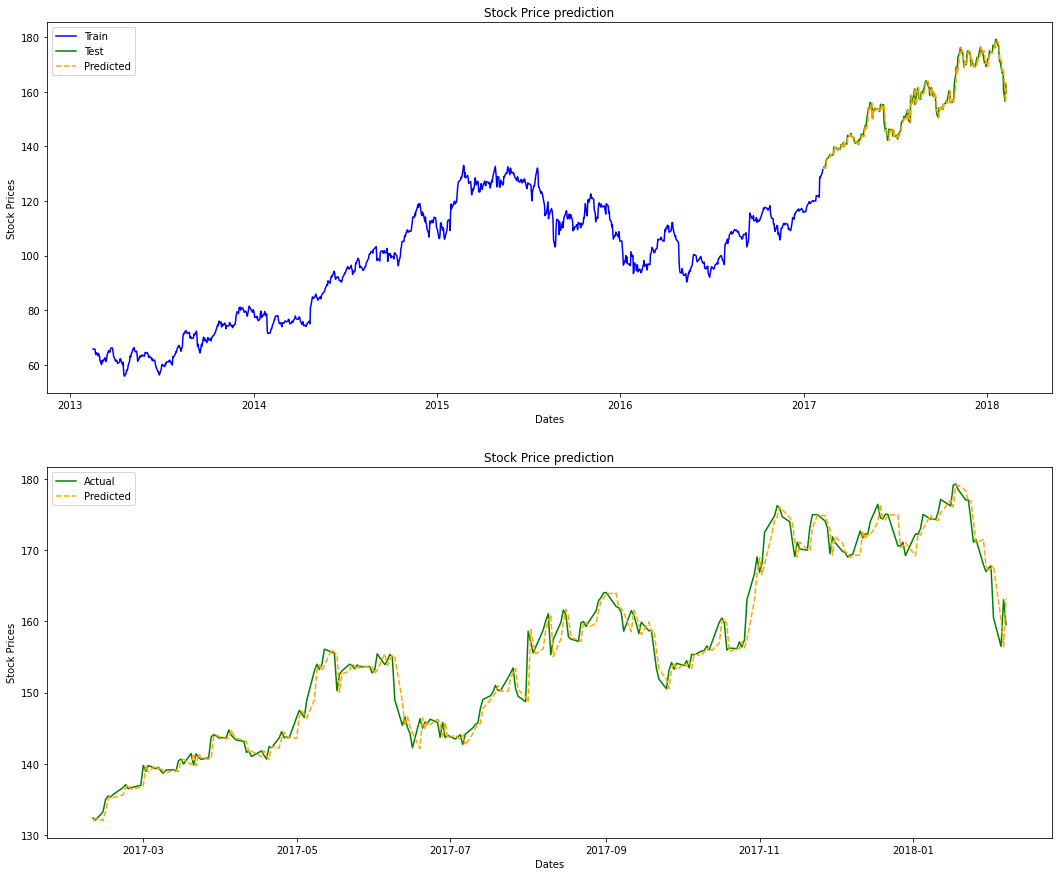

In [73]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(18,15))

axis1.plot(df['close'][:-252], color = 'blue', label = 'Train')
axis1.plot(df['close'][-251:], color = 'green', label = 'Test')
axis1.plot(eval_df['Predictions'], color = 'orange', label = 'Predicted', linestyle = '--')
axis1.set_xlabel('Dates')
axis1.set_ylabel('Stock Prices')
axis1.set_title('Stock Price prediction')
axis1.legend()

axis2.plot(eval_df['close'], color = 'green', label = 'Actual')
axis2.plot(eval_df['Predictions'], color = 'orange', label = 'Predicted', linestyle = '--')
axis2.set_xlabel('Dates')
axis2.set_ylabel('Stock Prices')
axis2.set_title('Stock Price prediction')
axis2.legend()

plt.show()


In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
root_mse = sqrt(mean_squared_error(eval_df['close'],eval_df['Predictions']))
print(root_mse)

1.8895731120065877
